# Title: House Price Prediction

## Objective: Predict house of a price given features

## Introduction

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

### Dataset source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/code?resource=download&select=Housing.csv

### Methods and techniques used:
#### Simple Linear Regression | Cook's Distance | Ridge, Lasso & ElasticNet Regression | Decision Tree | Random Forest | Gradient Boosted Tree | Extra Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()
# Datatypes of the features looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()
# Dont appear to have any null data

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning 

## Outlier removal for Price feature

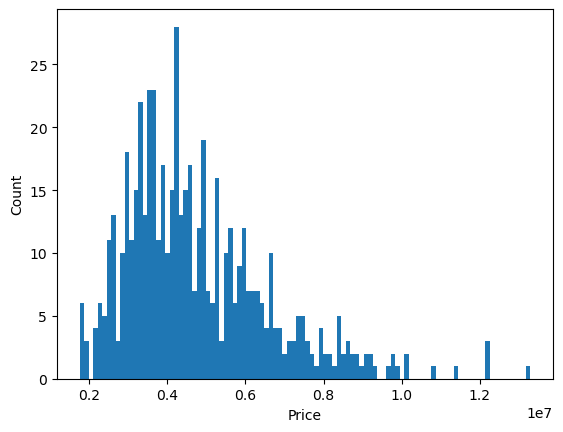

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [8]:
from scipy import stats

# Calculate z-scores for price column
z_scores = stats.zscore(df['price'])

# Define threshold for outlier detection
threshold = 3

# Find indices of data points with z-score greater than threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from DataFrame
df_clean = df.drop(df.index[outlier_indices])
# Removed data
outlier_indices

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [9]:
df = df_clean

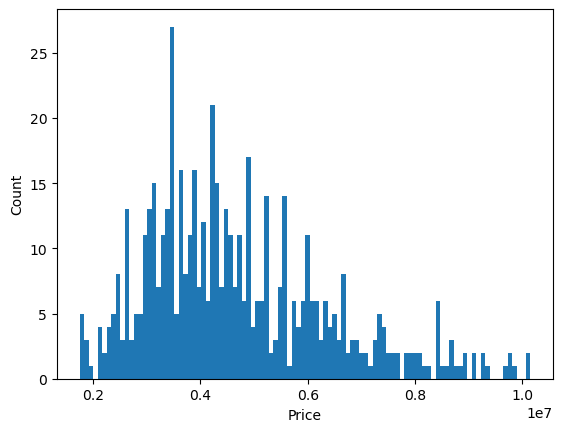

In [10]:
# Inspecting data for price feature after removal of outliers

plt.hist(df['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## Outlier removal for Area feature

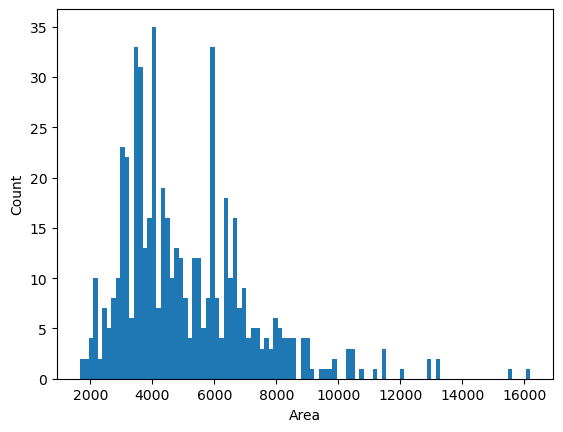

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['area'], bins=100)
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

In [12]:
# Calculate z-scores for price column
z_scores = stats.zscore(df['area'])

# Define threshold for outlier detection
threshold = 3

# Find indices of data points with z-score greater than threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from DataFrame
df = df.drop(df.index[outlier_indices])

# Removed data
outlier_indices

array([  1,   4,  60,  63, 119, 205, 397], dtype=int64)

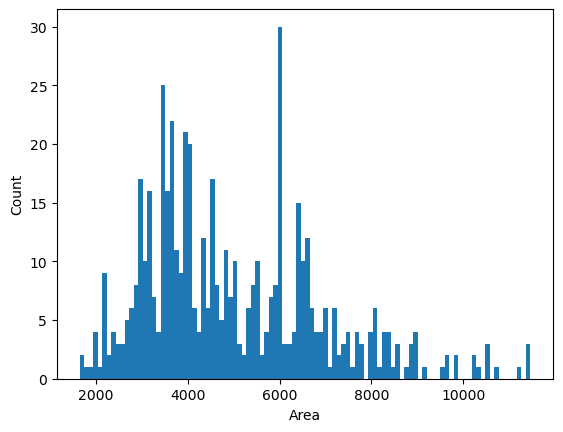

In [13]:
# Inspecting data for area feature after removal of outliers

plt.hist(df['area'], bins=100)
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

## Bedrooms feature

In [14]:
df['bedrooms'].value_counts()

3    294
2    135
4     90
5      9
6      2
1      2
Name: bedrooms, dtype: int64

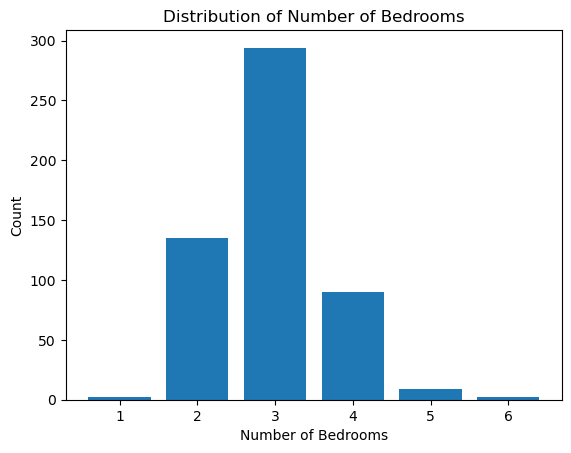

In [15]:
# count the number of occurrences of each unique value in the column
bedroom_counts = df['bedrooms'].value_counts()

# create a barplot
plt.bar(bedroom_counts.index, bedroom_counts.values)

# add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Number of Bedrooms')
plt.show()

In [16]:
'''

This code is for outlier removal for bedrooms feature

'''


# # Create a new DataFrame that excludes rows with 1, 5, and 6 bedrooms
# df = df.loc[~df['bedrooms'].isin([1, 5, 6])]

# # Verify the results
# # count the number of occurrences of each unique value in the column
# bedroom_counts = df['bedrooms'].value_counts()

# # create a barplot
# plt.bar(bedroom_counts.index, bedroom_counts.values)

# # add labels and title
# plt.xlabel('Number of Bedrooms')
# plt.xlim(0, 6)
# plt.ylabel('Count')
# plt.title('Distribution of Number of Bedrooms')
# plt.show()

'\n\nThis code is for outlier removal for bedrooms feature\n\n'

## Bedrooms feature

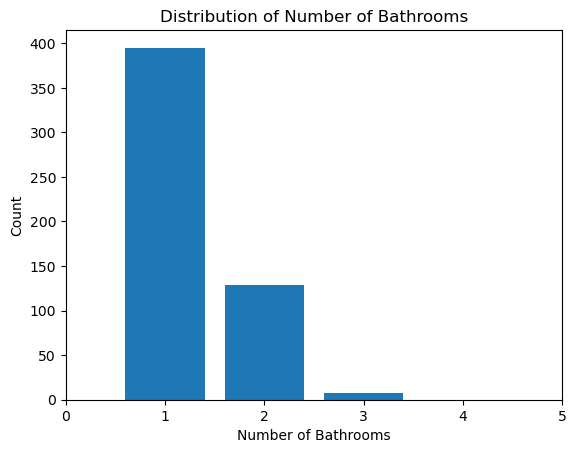

In [17]:
# count the number of occurrences of each unique value in the column
bathrooms_counts = df['bathrooms'].value_counts()

# create a barplot
plt.bar(bathrooms_counts.index, bathrooms_counts.values)

# add labels and title
plt.xlabel('Number of Bathrooms')
plt.xlim(0, 5)
plt.ylabel('Count')
plt.title('Distribution of Number of Bathrooms')
plt.show()

## Stories feature

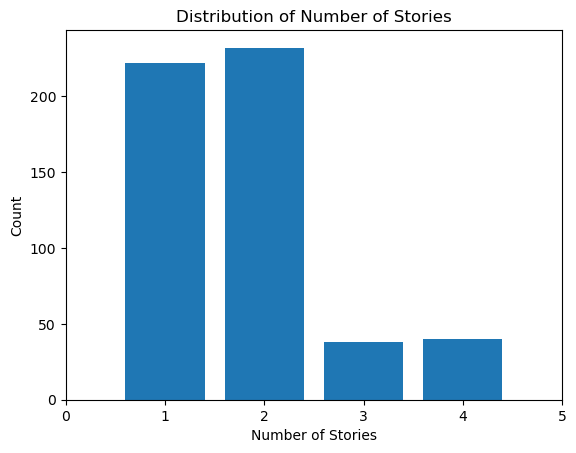

In [18]:
# count the number of occurrences of each unique value in the column
stories_counts = df['stories'].value_counts()

# create a barplot
plt.bar(stories_counts.index, stories_counts.values)

# add labels and title
plt.xlabel('Number of Stories')
plt.xlim(0, 5)
plt.ylabel('Count')
plt.title('Distribution of Number of Stories')
plt.show()

## Parking feature

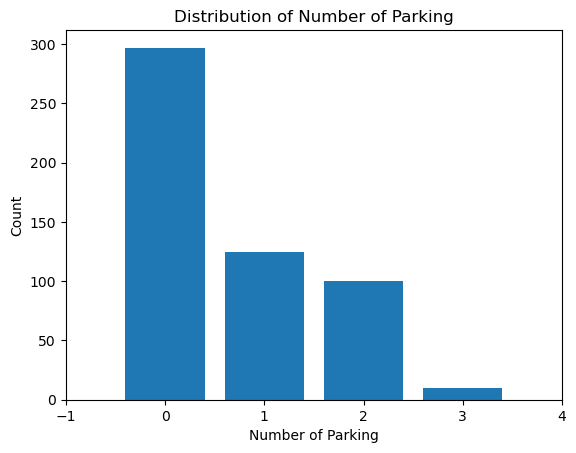

In [19]:
# count the number of occurrences of each unique value in the column
parking_counts = df['parking'].value_counts()

# create a barplot
plt.bar(parking_counts.index, parking_counts.values)

# add labels and title
plt.xlabel('Number of Parking')
plt.xlim(-1, 4)
plt.ylabel('Count')
plt.title('Distribution of Number of Parking')
plt.show()

## Exploratory Data Analysis

**Let's explore the data!**

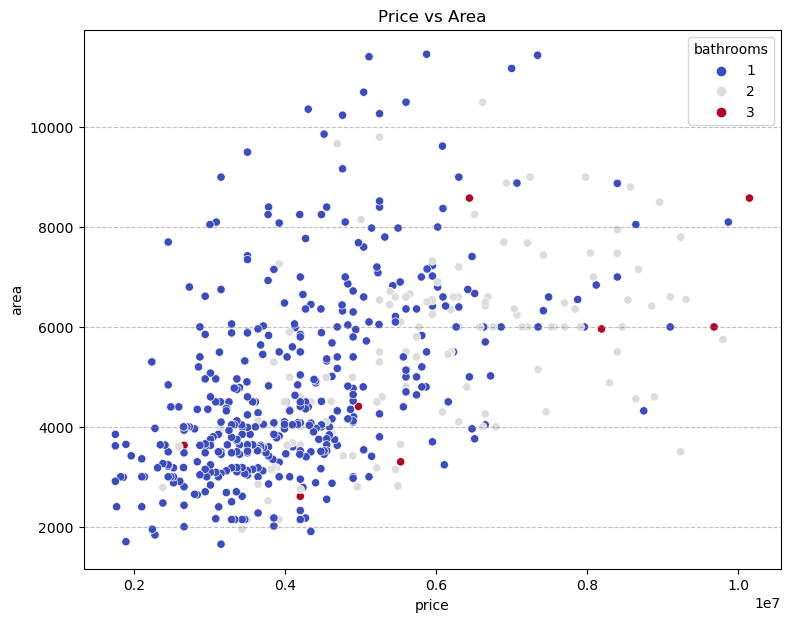

In [20]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='price',y='area',hue='bathrooms',palette='coolwarm')
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.title('Price vs Area')
plt.show()

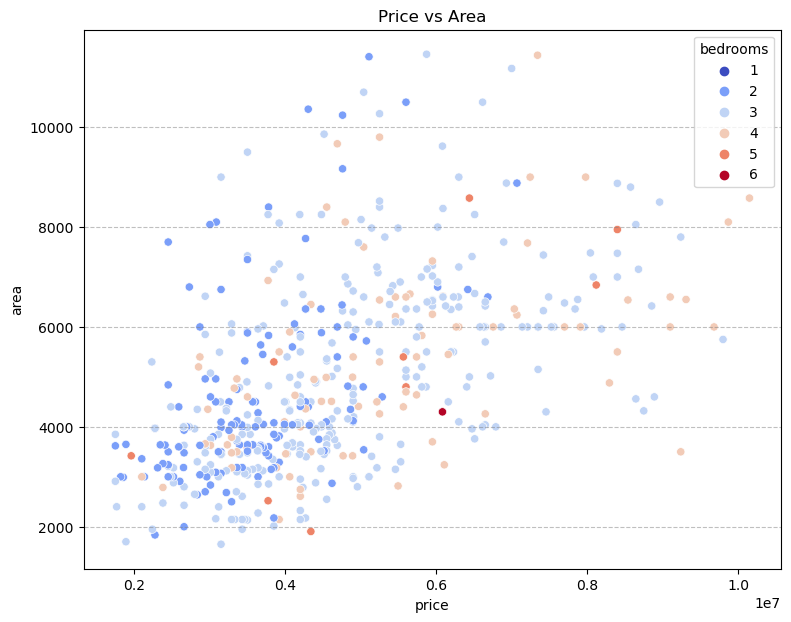

In [21]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='price',y='area',hue='bedrooms',palette='coolwarm')
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.title('Price vs Area')
plt.show()

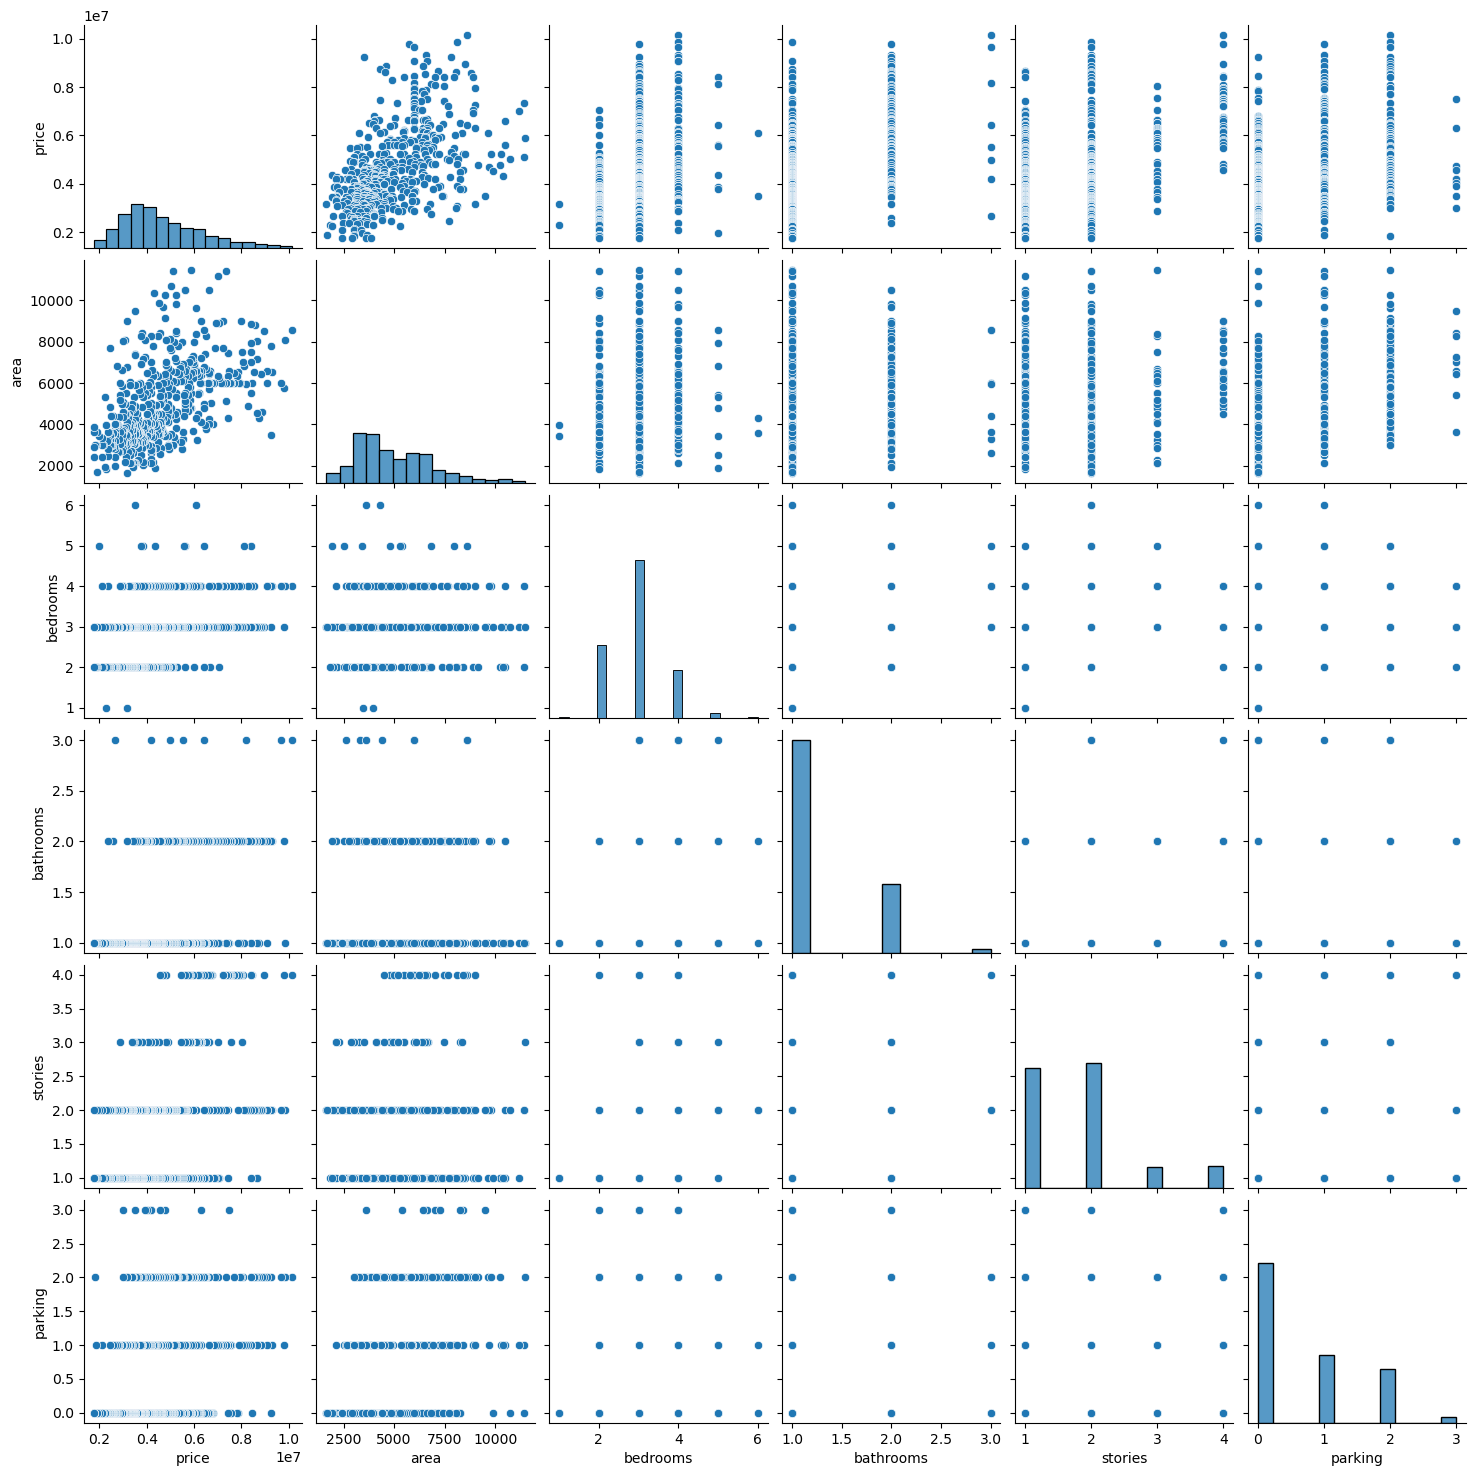

In [22]:
sns.pairplot(df)

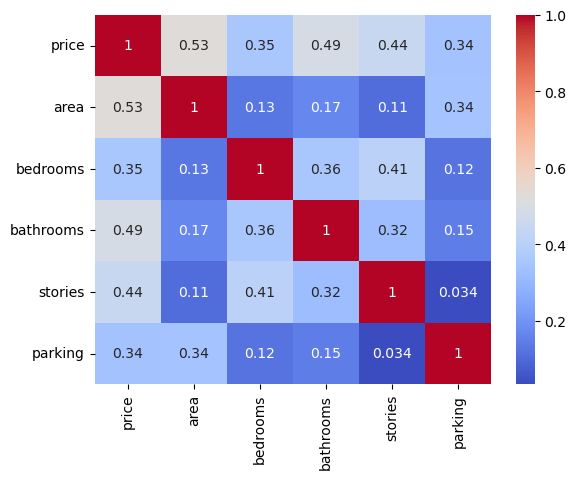

In [23]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## One-hot encoding for categorical columns

In [24]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished


In [25]:
df['furnishingstatus'].value_counts()

semi-furnished    224
unfurnished       176
furnished         132
Name: furnishingstatus, dtype: int64

In [26]:
# get a list of all categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# perform one-hot encoding for each categorical column
for col in cat_cols:
    if col != 'furnishingstatus':
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = df.drop(col, axis=1)
        df = df.join(one_hot)

# So far furnishingstatus was excluded because of the drop_first=True option, as the column got 3 categories
# Code below is to one-hot encode for furnishingstatus while specifying drop_first=False

    if col == 'furnishingstatus':
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=False)
        df = df.drop(col, axis=1)
        df = df.join(one_hot)

In [27]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,0,1,0
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,0,1
11,9681000,6000,4,3,2,2,1,1,1,1,0,0,0,1,0
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


## Train Test Split

In [28]:
y = df['price']
X = df.iloc[:, 1:]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Normalize features

In [30]:
# Initialize StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Simple Linear Regression

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [33]:
predictions = lm.predict(X_test_scaled)

In [34]:
# Create a dataframe with predicted values and actual values side by side
df_predictions = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
df_predictions

,Predicted,Actual
117,4.789327e+06,5950000
16,7.287614e+06,9100000
110,5.629685e+06,6090000
399,4.239173e+06,3500000
326,2.769556e+06,3990000
...,...,...
461,4.128361e+06,3080000
230,4.499238e+06,4690000
224,6.274784e+06,4760000
154,5.077433e+06,5530000


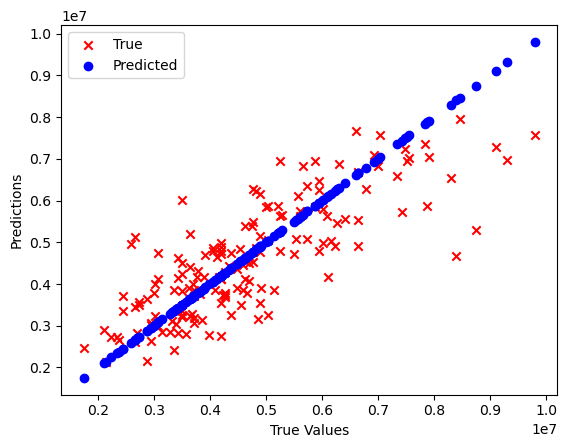

In [35]:
predictions = lm.predict(X_test_scaled)

plt.scatter(y_test, predictions, marker='x', color='red', label='True')
plt.scatter(y_test, y_test, marker='o', color='blue', label='Predicted')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [36]:
# Evaluate the model using metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE_Simple = round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),4)


print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE_Simple)

MAE: 741696.010878787
MSE: 958428074898.4615
RMSE: 978993.3988


In [37]:
mean_target = df['price'].mean()
mean_target
result_Simple = round((RMSE_Simple/mean_target)*100,3) 

In [38]:
print('Predictions from this simple model have an average error of {}% relative to the mean target value'.format(result_Simple))

Predictions from this simple model have an average error of 21.022% relative to the mean target value


## Linear Regression with Cook's Distance to remove outliers to improve RMSE score

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Fit the linear regression model
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Get the fitted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid

# Calculate Cook's distance
p = X.shape[1] - 1
MSE = np.mean(residuals**2)
influence = results.get_influence()
leverage = influence.hat_matrix_diag
cook_distance = (residuals / (p * MSE)) * (leverage / (1 - leverage)**2)

# Identify outliers with Cook's distance greater than threshold
threshold = 4 / (X.shape[0] - p - 1)
outliers = np.where(cook_distance > threshold)[0]

# Remove outliers and refit the model
X = X.drop(outliers, axis=0)
y = y.drop(outliers, axis=0)
model = sm.OLS(y, X)
results = model.fit()

# Get the new fitted values and residuals
new_fitted_values = results.fittedvalues
new_residuals = results.resid

# Calculate the new RMSE
RMSE_Simple = np.sqrt(np.mean(new_residuals**2))
result_Simple = round((RMSE_Simple / y.mean()) * 100, 3)

# Print the results
print('Linear regression model with outliers removed obtained RMSE of {} | {}% average error.'.format(round(RMSE_Simple, 4), result_Simple))

Linear regression model with outliers removed obtained RMSE of 960465.7766 | 20.624% average error.


## Using GridSearchCV to find optimal hyperparameter alpha value for Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to search
alpha_range = np.linspace(-1, 20, 1000)

# Create a Ridge model object
ridge_model = Ridge()

# Create a parameter grid to search over
param_grid = {'alpha': alpha_range}

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best alpha value and corresponding RMSE score
print("Best Alpha:", grid_search.best_params_['alpha'])

Best Alpha: -0.8528528528528528


# Ridge Regression

In [44]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
import numpy as np

# Define the number of folds
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Create a linear regression model
# Using the alpha value obtained from GridSearchCV earlier
model = Ridge(alpha=grid_search.best_params_['alpha'])

# Perform cross-validation
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
RMSE_Ridge = np.sqrt(-mse_scores)

# Print the RMSE scores for each fold
print("RMSE Scores:", RMSE_Ridge)

# Print the mean and standard deviation of the RMSE scores
print("Mean RMSE:", round((RMSE_Ridge.mean()),4))
RMSE_Ridge = round((RMSE_Ridge.mean()),4)
result_Ridge = round((RMSE_Ridge.mean()/mean_target)*100,3)
print('Predictions from this Ridge model have an average error of {}% relative to the mean target value'.format(result_Ridge))

RMSE Scores: [ 896172.42322445 1000207.86652856 1197182.74489912 1279194.17288124
 1021963.09310409  902290.64701168  838298.2339445   796118.84277923
  877463.09394566 1078725.80718613]
Mean RMSE: 988761.6926
Predictions from this Ridge model have an average error of 21.231% relative to the mean target value


### Looks like performance became worse by using GridSearchCV

## Lasso Regression & K-Fold to improve RMSE score

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the number of folds
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Create a Lasso regression model
model = Lasso(alpha=grid_search.best_params_['alpha'])

# Perform cross-validation
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
RMSE_Lasso = np.sqrt(-mse_scores)

# Print the RMSE scores for each fold
print("RMSE Scores:", RMSE_Lasso)

# Print the mean and standard deviation of the RMSE scores
print("Mean RMSE:", round((RMSE_Lasso.mean()),4))
RMSE_Lasso = round((RMSE_Lasso.mean()),4)
result_Lasso = round((RMSE_Lasso.mean()/mean_target)*100,3)
print('Predictions from this Lasso model have an average error of {}% relative to the mean target value'.format(result_Lasso))


RMSE Scores: [ 924697.27151909 1021493.37724485 1080582.24396922  959500.30117014
 1016307.70643503  892830.95168815  849175.90409936  961604.34460599
 1038595.67740771 1142314.0565259 ]
Mean RMSE: 988710.1835
Predictions from this Lasso model have an average error of 21.23% relative to the mean target value


## Elastic Net approach

In [47]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_boston
import numpy as np

# Define the Elastic Net model
model = ElasticNet()

# Define the hyperparameter grid
param_grid = {'alpha': np.logspace(-4, 4, 9), 'l1_ratio': [0.01, 0.25, 0.5, 0.75, 0.99]}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train the Elastic Net model with the best hyperparameters
model = ElasticNet(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
RMSE_ElasticNet = round(np.sqrt(mse),4)
print("RMSE:", RMSE_ElasticNet)
result_ElasticNet = round((RMSE_ElasticNet/mean_target)*100,3)
print('Predictions from this Elastic model have an average error of {}% relative to the mean target value'.format(result_ElasticNet))

RMSE: 979364.5477
Predictions from this Elastic model have an average error of 21.029% relative to the mean target value


# Tree methods for regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict

rmse_scores = []

def model(Test, n, m):
    global rmse_scores
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=Test, random_state=42)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    regression = {
        'LINEAR': LinearRegression(),
        'DECISION': DecisionTreeRegressor(),
        'FOREST': RandomForestRegressor(n_estimators=n, max_depth=m),
        'GRADIENT': GradientBoostingRegressor(n_estimators=n, max_depth=m),
        'EXTRA': ExtraTreesRegressor(n_estimators=n, max_depth=m)
    }
    
    for name, model in regression.items():
        print('=><='*20)
        print('MODEL:', name)
        
        score = cross_val_score(model, x_train, y_train, cv=10, n_jobs=-1)
        y_pred = cross_val_predict(model, x_train, y_train, cv=10, n_jobs=-1)
        
        rmse = np.sqrt(mean_squared_error(y_train, y_pred))
        rmse_scores.append(rmse)
        
        avg_error = round((rmse / y.mean()) * 100, 3)

        print('Cross Val Score:', score.mean())
        print('RMSE: {} | Average error: {}%'.format(rmse, avg_error))
        
        plt.scatter(y_train, y_pred)
        plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])
        plt.xlabel('Current Values')
        plt.ylabel('Predict Values')
        plt.show()


=><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><=
MODEL: LINEAR
Cross Val Score: 0.57820662726852
RMSE: 1008149.326588881 | Average error: 21.648%


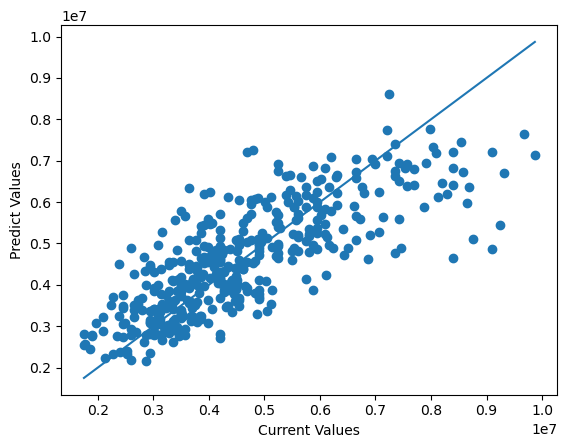

=><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><=
MODEL: DECISION
Cross Val Score: 0.15139197977267504
RMSE: 1305622.1195934773 | Average error: 28.035%


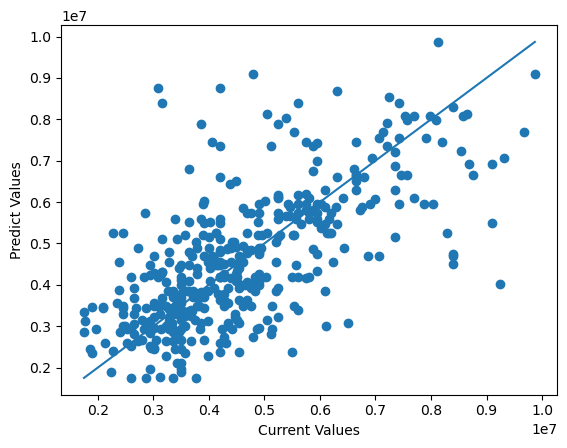

=><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><=
MODEL: FOREST
Cross Val Score: 0.5521388899391789
RMSE: 1045377.1523716835 | Average error: 22.447%


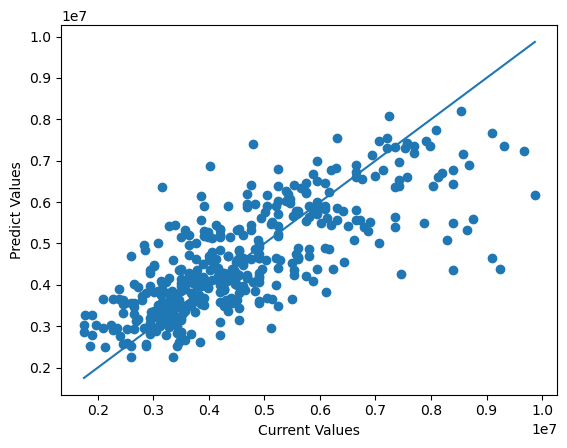

=><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><=
MODEL: GRADIENT
Cross Val Score: 0.3255844847420402
RMSE: 1221441.287568902 | Average error: 26.227%


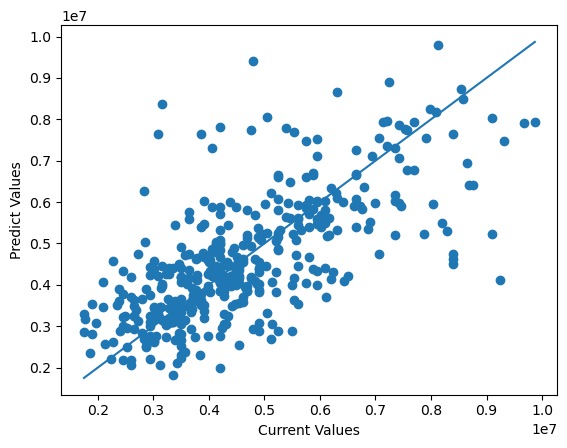

=><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><==><=
MODEL: EXTRA
Cross Val Score: 0.4695482454135399
RMSE: 1123894.6814750142 | Average error: 24.133%


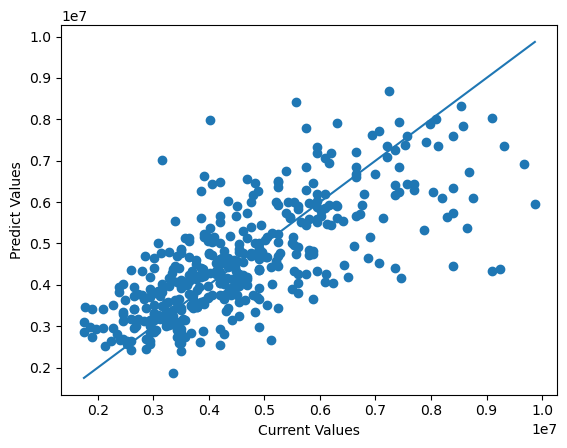

In [55]:
model(0.2, 100,10)

In [56]:
result_DT = round((rmse_scores[0] / y.mean()) * 100, 3)
result_RF = round((rmse_scores[1] / y.mean()) * 100, 3)
result_GBT = round((rmse_scores[2] / y.mean()) * 100, 3)
result_ET = round((rmse_scores[3] / y.mean()) * 100, 3)

# Conclusion and Summary

In [57]:
print('Simple linear regression with Cooks Distance model obtained RMSE of {} | {}% average error'.format(RMSE_Simple,result_Simple))
print('\n')
print('Ridge regression model obtained RMSE of {} | {}% average error'.format(RMSE_Ridge,result_Ridge))
print('\n')
print('Lasso regression model obtained RMSE of {} | {}% average error'.format(RMSE_Lasso,result_Lasso))
print('\n')
print('Elastic Net regression model obtained RMSE of {} | {}% average error'.format(RMSE_ElasticNet,result_ElasticNet))
print('\n')
print('Decision Tree regression model obtained RMSE of {} | {}% average error'.format(rmse_scores[0],result_DT))
print('\n')
print('Random Forest regression model obtained RMSE of {} | {}% average error'.format(rmse_scores[1],result_RF))
print('\n')
print('Gradient Boosted Tree regression model obtained RMSE of {} | {}% average error'.format(rmse_scores[2],result_GBT))
print('\n')
print('Extra Tree regression model obtained RMSE of {} | {}% average error'.format(rmse_scores[3],result_ET))

Simple linear regression with Cooks Distance model obtained RMSE of 960465.7765848425 | 20.624% average error


Ridge regression model obtained RMSE of 988761.6926 | 21.231% average error


Lasso regression model obtained RMSE of 988710.1835 | 21.23% average error


Elastic Net regression model obtained RMSE of 979364.5477 | 21.029% average error


Decision Tree regression model obtained RMSE of 1008149.326588881 | 21.648% average error


Random Forest regression model obtained RMSE of 1305622.1195934773 | 28.035% average error


Gradient Boosted Tree regression model obtained RMSE of 1045377.1523716835 | 22.447% average error


Extra Tree regression model obtained RMSE of 1221441.287568902 | 26.227% average error


### To conclude, simple linear regression with Cook's Distance for outlier removal approach has the best performance at an average error of 20.624%
#### Neural network approach not used due to a small dataset (~545 entries) which yielded very bad performance.